# Лабораторна робота 3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією

## 1. Приклад апроксимації поліномом

In [6]:
import numpy as np

def predict_poly(x, koeff):
    res = 0
    # Обчислення значень для кожного степеня x та відповідного коефіцієнта
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    # Обчислення значення полінома за формулою
    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

# Створення даних для x та y
x = np.arange(0, 5.1, 0.1)
y = 1 / (1 + 10 * np.square(x)) # обчислення значення функції

# Обрання кожної другої точки для тренувальних даних
x_train, y_train = x[::2], y[::2]

N = len(x)

# Підгонка полінома 10-го степеня до тренувальних даних
z_train = np.polyfit(x_train, y_train, 11)
print(z_train)

[ 3.22856251e-04 -9.41568977e-03  1.19787990e-01 -8.72105386e-01
  4.00466932e+00 -1.20443982e+01  2.38146142e+01 -3.00993346e+01
  2.24323620e+01 -7.62731800e+00 -6.27006752e-01  1.00098112e+00]


## 2. Приклад поліноміальної регресії з L2-регуляризатором

[ 4.97805499e+02 -5.95552295e-01 -1.00242472e+00 -1.27463387e+00
 -1.09229064e+00 -1.87398247e-01  6.62428923e-01 -3.05587802e-01
  6.93002539e-02 -9.06098890e-03  6.96774005e-04 -2.93758585e-05
  5.25326499e-07]


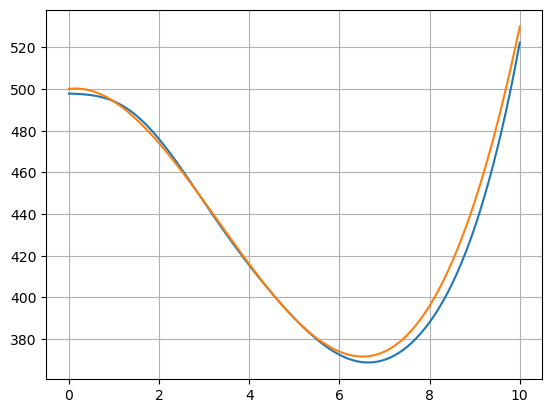

In [5]:
# Приклад роботи регуляризатора L2

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функція у вигляді полінома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # розмір простору ознак (степінь полінома N-1)
L = 20  # при збільшенні N збільшується L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матриця вхідних векторів
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матриця lambda*I
IL[0][0] = 0  # перший коефіцієнт не регуляризується
X_train = X[::2]  # навчальна вибірка
Y = y_train  # навчальна вибірка

# обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL) # Тут і нижче @ - оператор точного матричного множення
w = Y @ X_train @ A
print(w)

# відображення початкового графіка та прогнозу
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy) # прогноз моделі
plt.plot(x, y) # справжня поведідка функції
plt.grid(True)
plt.show()

## 3. Бінарний лінійни класифікатор з L1 регуляризатором

[ 1.73264986e-02 -1.27367900e-05 -9.01791740e-07]
1.0039946558390853


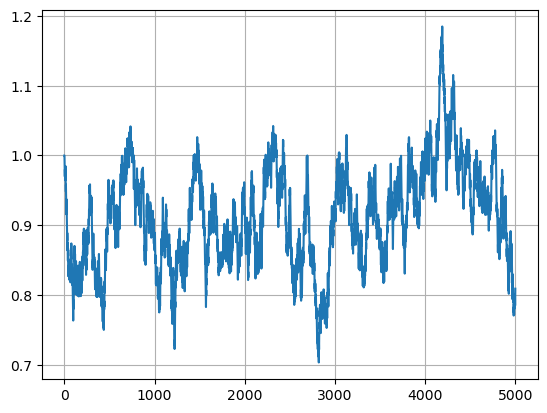

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0 # Коефіцієнт L1-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Навчальна вибірка з трьома ознаками (третій - константа +1)

wb = openpyxl.load_workbook('lab_3_variant.xlsx')
ws = wb.active

x_train_0 = np.array([float(ws.cell(row=i,column=1).value) for i in range(2, ws.max_row+1)])
x_train_1 = np.array([float(ws.cell(row=i,column=2).value) for i in range(2, ws.max_row+1)])
y_train = np.array([float(ws.cell(row=i,column=3).value) for i in range(2, ws.max_row+1)])

# Об'єднуємо дані у вхідні вектори
x_train = np.column_stack((x_train_0, x_train_1, np.ones_like(x_train_0)))
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001             # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                 # Кількість ітерацій SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()

## 4. Бінарний лінійни класифікатор з L2 регуляризатором

[0.01989444 0.00747958 0.01251656]
0.8001969485364995


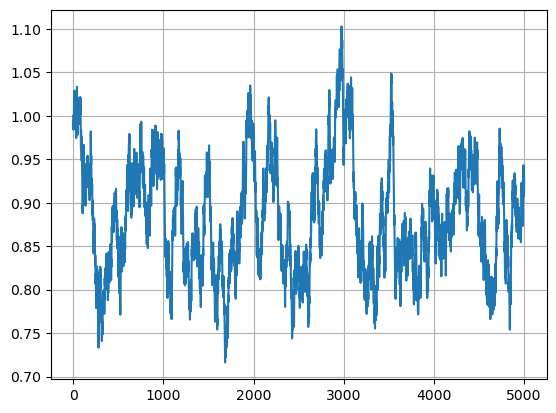

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
# Навчальна вибірка з трьома ознаками (третій - константа +1)

wb = openpyxl.load_workbook('lab_3_variant.xlsx')
ws = wb.active

x_train_0 = np.array([float(ws.cell(row=i,column=1).value) for i in range(2, ws.max_row+1)])
x_train_1 = np.array([float(ws.cell(row=i,column=2).value) for i in range(2, ws.max_row+1)])
y_train = np.array([float(ws.cell(row=i,column=3).value) for i in range(2, ws.max_row+1)])

# Об'єднуємо дані у вхідні вектори
x_train = np.column_stack((x_train_0, x_train_1, np.ones_like(x_train_0)))
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w з L2-регуляризатором
def df(w, x, y, lambd):
    M = np.dot(w, x) * y
    regularization_term = 2 * lambd * w  # Додати L2-регуляризатор
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + regularization_term

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001             # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                 # Кількість ітерацій SGD
lambd = 0.01            # Параметр для L2-регуляризатора

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску з L2-регуляризатором
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k], lambd)  # Коригування вагів за допомогою SGD з L2-регуляризатором
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()


Після модернізації коду з використанням L2-регуляризатора, очікується, що графік функції втрат буде має більш стабільний характер, оскільки L2-регуляризатор служить для уникнення перенавчання та зменшення величини вагових коефіцієнтів.

## Відповіді на контрольні питання

Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації?

**L2-регуляризатор - це вид регуляризації, що використовується для управління перенавчанням моделі шляхом штрафування великих значень вагових коефіцієнтів. У задачах регресії L2-регуляризатор додає квадратичні значення вагових коефіцієнтів до функції втрат, що сприяє більш рівномірному розподілу вагових коефіцієнтів та запобігає їхній великій дисперсії. У задачах класифікації L2-регуляризатор застосовується до вагових коефіцієнтів моделі, що визначають границі розділення класів.**

Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчання?

**Основна відмінність між L1- та L2-регуляризаторами полягає у функціях, які вони використовують для штрафування великих значень вагових коефіцієнтів: L1-регуляризатор використовує абсолютні значення вагових коефіцієнтів, що призводить до видалення незначущих ознак та стимулює розрідженість моделі,а L2-регуляризатор використовує квадратичні значення вагових коефіцієнтів, що сприяє меншій дисперсії та робить модель більш стійкою до великих змін в вхідних даних.**

Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Python?

**Простий лінійний бінарний класифікатор можна реалізувати за допомогою стохастичного градієнтного спуску в Python, використовуючи логістичну регресію. Цей метод вимагає ітеративної оптимізації функції втрат за допомогою градієнтного спуску, в якому кожен крок визначається за допомогою випадкового вибору навчального прикладу. Під час кожного кроку оновлюються параметри моделі в напрямку антиградієнту функції втрат.**

Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала якості?

**Стохастичний градієнтний спуск - це метод оптимізації, який використовує випадковість для обчислення оцінки градієнта функції втрат. Він використовується для оптимізації функціоналу якості шляхом мінімізації очікуваного значення втрати.**

Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регресії?

**Використання регуляризаторів (L1 та L2) під час навчання моделі може допомогти уникнути перенавчання, зменшити чутливість моделі до шуму та покращити її загальну здатність до узагальнення на нові дані. L1-регуляризатор віддає перевагу розрідженим моделям з малим числом ненульових вагових коефіцієнтів, а L2-регуляризатор сприяє більш рівномірному розподілу вагових коефіцієнтів та покращує стійкість моделі до великих змін в вхідних даних.**